# Data and Programming Foundations for AI Skill Porfolio Project

This project is to showcase how data can be handled with the Python feature "pandas", how data can be analyzed by python, and how algebra and calculus can be pulled from data and what can be predicted from it. Let's upload the data and print out parts of it

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RAMP_OBD_data = pd.read_csv("RAMP_Open_Bid_Opportunities.csv")
DOHMH_HIV_AIDS_data = pd.read_csv("DOHMH_HIV_AIDS_Annual_Report.csv")
print(RAMP_OBD_data.head(20))

    RAMP ID                                              Title   Status  \
0    225529                     144777 MISCELLANEOUS, HARDWARE  Amended   
1    226108  LACDA25-119 - Supportive Housing Services - Cl...     Open   
2    226107                          144923 CONNECTORS, BRONZE     Open   
3    226015  144375 FHPP - Cooling Water Outdoor Centrifuga...  Amended   
4    225676  90867 OA for LASAN Coordination and AWPF Devel...  Amended   
5    226104  LACDA25-119 - Supportive Housing Services - Cl...     Open   
6    226103  LACDA25-119 - Supportive Housing Services - Cl...     Open   
7    226102        PAINT & TOOLS, AUTOMOTIVE REFINISH PRODUCTS     Open   
8    226101  LACDA25-119 - Supportive Housing Services - Cl...     Open   
9    226096  LACDA25-119 - Supportive Housing Services - Cl...     Open   
10   226097  RFB-IS-26200322 - Dialysis Water Testing, DHS....     Open   
11   226098  RFB-IS-26200321 - SECURITY CAMERAS - BRAND ONL...     Open   
12   226095  LACDA25-119 

In [ ]:
type_amount = RAMP_OBD_data.groupby('Type').size().reset_index(name='Count')
print(type_amount)

                              Type  Count
0         IFB - Invitation for Bid     51
1        RAB - Reverse Auction Bid      1
2            RFB - Request For Bid     51
3    RFI - Request for Information      8
4       RFP - Request For Proposal     41
5  RFQ - Request For Qualification      5
6          RFQ - Request for Quote     11
7                        RFQ-Bench      3
8                      RFQ-Prequal      5
9    TOS - Task Order Solicitation     11


In [69]:
type_source = RAMP_OBD_data.groupby(['Type', 'Status']).size().reset_index(name='Count')

types_pivot = type_source.pivot(
    index='Type',
    columns='Status',
    values='Count'
).reset_index()

types_pivot.fillna(0, inplace=True)
types_pivot['percent_open'] = types_pivot['Open'] / (types_pivot['Open'] + types_pivot['Amended'])

print(types_pivot)

Status                             Type  Amended  Open  percent_open
0              IFB - Invitation for Bid     16.0  35.0      0.686275
1             RAB - Reverse Auction Bid      0.0   1.0      1.000000
2                 RFB - Request For Bid      6.0  45.0      0.882353
3         RFI - Request for Information      1.0   7.0      0.875000
4            RFP - Request For Proposal     16.0  25.0      0.609756
5       RFQ - Request For Qualification      0.0   5.0      1.000000
6               RFQ - Request for Quote      0.0  11.0      1.000000
7                             RFQ-Bench      1.0   2.0      0.666667
8                           RFQ-Prequal      1.0   4.0      0.800000
9         TOS - Task Order Solicitation      2.0   9.0      0.818182


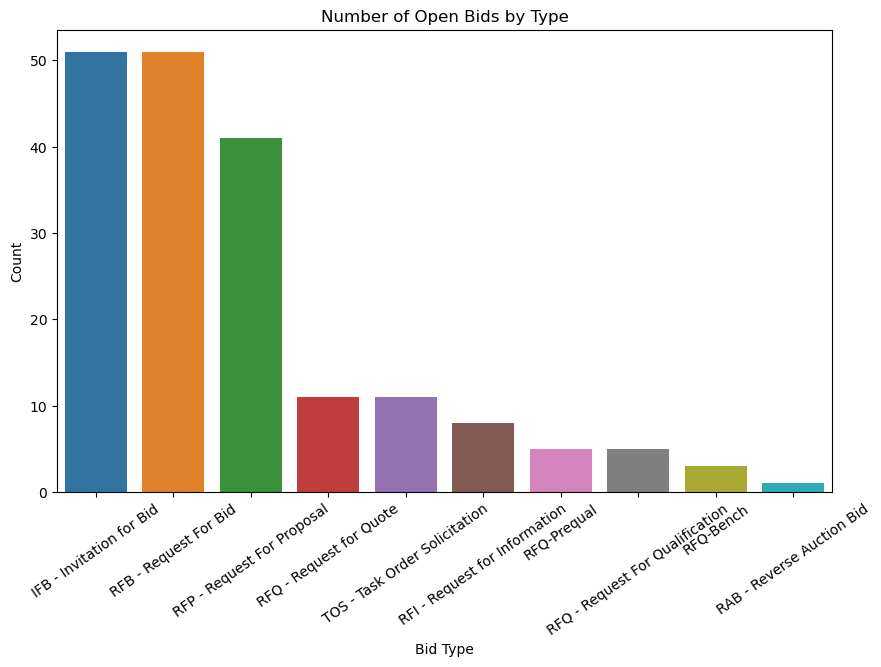

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=RAMP_OBD_data, x='Type', order=RAMP_OBD_data['Type'].value_counts().index)
plt.title('Number of Open Bids by Type')
plt.xlabel('Bid Type')
plt.ylabel('Count')
plt.xticks(rotation=35)
plt.show()
